In [ ]:
!pip install tensorflow==1.13.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
base_directory = '/content/drive/My Drive/COS Seesaw Research'
working_directory = base_directory + '/OCS DCRNN'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.insert(0, '/content/drive/My Drive/COS Seesaw Research/OCS DCRNN')

from lib.utils import load_graph_data
from model.dcrnn_supervisor import DCRNNSupervisor

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
import numpy as np
import os
import tensorflow as tf
import yaml

config_filename = working_directory + '/data/model/dcrnn_DR_2_h_5_70-70-70_lr_0.01_bs_12_0528235356/config_100.yaml'
with open(config_filename) as f:
  config = yaml.load(f)

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True
graph_pkl_filename = config['data']['graph_pkl_filename']
_, _, adj_mx = load_graph_data(graph_pkl_filename)


In [ ]:
sess = tf.Session(config=tf_config)
supervisor = DCRNNSupervisor(adj_mx=adj_mx, **config)
supervisor.load(sess, config['train']['model_filename'])
outputs = supervisor.evaluate(sess)

In [ ]:
outputs.keys()

dict_keys(['predictions', 'groundtruth'])

In [ ]:
ground_truth = outputs['groundtruth']
predictions = outputs['predictions']

In [ ]:
predictions_dict = {}
ground_truth_dict = {}

#horizons, samples, sites

In [ ]:
current_ground_truth = ground_truth[0]
current_prediction = predictions[0]
cos_sites = ['alt', 'brw', 'cgo', 'hfm', 'kum', 'lef', 'mhd', 'mlo', 'nwr', 'psa', 'smo', 'spo', 'sum', 'thd']

for site in cos_sites:
  ground_truth_dict[site] = []
  predictions_dict[site] = []

for sample in current_ground_truth:
  for i in range(len(sample)):
    ground_truth_dict[cos_sites[i]].append(sample[i])

for sample in current_prediction:
  for i in range(len(sample)):
    predictions_dict[cos_sites[i]].append(sample[i])

In [ ]:
ground_truth_dict['cgo']

In [ ]:
predictions_dict['cgo']

In [ ]:
from tensorflow.python.ops.gen_data_flow_ops import random_shuffle_queue_v2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

for site in cos_sites:
  rmse = math.sqrt(mean_squared_error(ground_truth_dict[site], predictions_dict[site]))
  mae = mean_absolute_error(ground_truth_dict[site], predictions_dict[site])
  mape = mean_absolute_percentage_error(ground_truth_dict[site], predictions_dict[site])
  print(site, ' rmse: ', rmse)
  print(site, ' mae:', mae)
  print(site, ' mape: ', mape)

In [ ]:
import pandas as pd
from datetime import datetime as dt
days = pd.date_range(start=dt(year=2015, month=4, day=1), end=dt(year=2017, month=11, day=1), freq='SM')
days

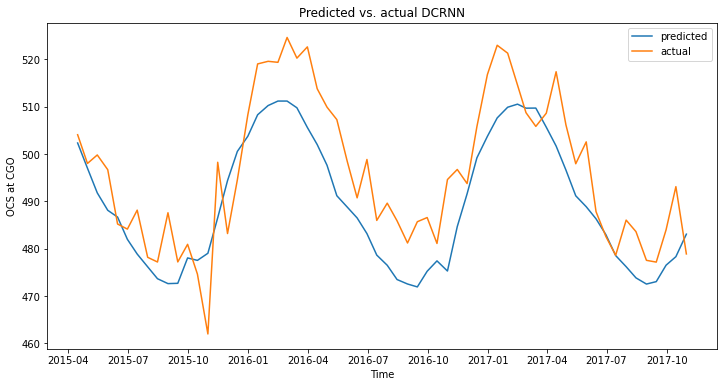

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(days, predictions_dict['cgo'], '-', label='predicted')
ax.plot(days, ground_truth_dict['cgo'], '-', label='actual')
ax.set_xlabel('Time')
ax.set_ylabel('OCS at CGO')
ax.set_title('Predicted vs. actual DCRNN')
plt.legend()
plt.show()

In [ ]:
something = tf.get_default_graph().get_tensor_by_name('DCRNN/DCRNN_SEQ/rnn_decoder/multi_rnn_cell/cell_2/dcgru_cell/projection/w:0')

In [ ]:
values = sess.run(something)
values

In [ ]:
tf.trainable_variables()

In [ ]:
for variable in tf.trainable_variables():
  print(variable)



  #print(variable.eval())
  #print(variable.name)
  #print(variable.shape)
  #print(variable.dtype)
  #print(variable.op)
  #print(variable[1])
  #display(variable.graph)

  print('--------------------------------------')
